In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image 
import xgboost as xgb
import pydotplus


In [6]:
df = pd.read_csv("/Users/priya/Documents/GitHub/Classification-Models/Decision_Trees/Classification Trees/Data/Movie_classification.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Missing Value Imputation

In [8]:
df['Time_taken'].mean()

np.float64(157.3914979757085)

In [9]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

df.head()

/var/folders/2b/wgc3l8k55bv300zzsy079nqr0000gn/T/ipykernel_15217/214774093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Dummy Variable Creation

In [11]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)

df.head(2)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.91,7.995,7.94,...,109.60,223.840,23,494,48000,1,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.44,7.470,7.44,...,146.64,243.456,42,462,43200,0,False,False,True,False


Independent (X) and Dependent (y) variable split

In [12]:
X = df.loc[:,df.columns!="Start_Tech_Oscar"]

In [13]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


In [14]:
X.shape

(506, 20)

In [15]:
y = df["Start_Tech_Oscar"]

In [16]:
y.shape

(506,)

Train and Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [18]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,False,False,False,True
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,False,False,False,False
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,True,True,False,False
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,True,False,False,True
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,True,False,False,False


In [19]:
X_train.shape

(404, 20)

In [20]:
X_test.shape

(102, 20)

Training Classification Tree

In [21]:
classification_tree = tree.DecisionTreeClassifier(max_depth=3)

classification_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Predict values using trained model

In [22]:
y_train_pred = classification_tree.predict(X_train)
y_test_pred = classification_tree.predict(X_test)

In [23]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

Model Performance

In [24]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]])

In [25]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]])

In [26]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

Plotting decision tree

In [27]:
dot_data = tree.export_graphviz(classification_tree, out_file=None, feature_names=X_train.columns, filled = True)

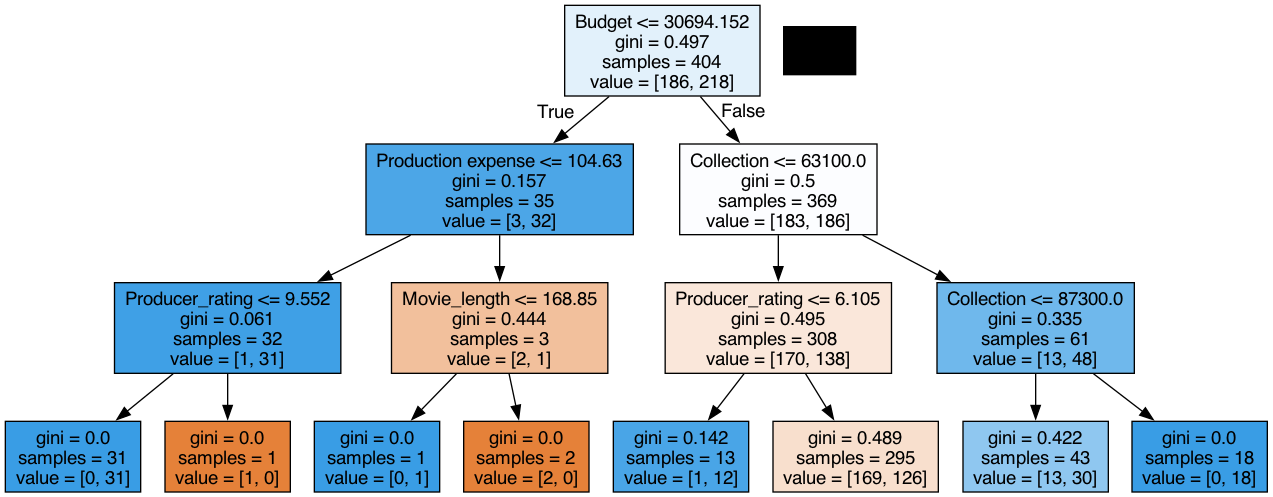

In [28]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

- Blue color - High purity of one's
- Orange color - High purity of zero's
- white color - No purity

Controlling Tree Growth

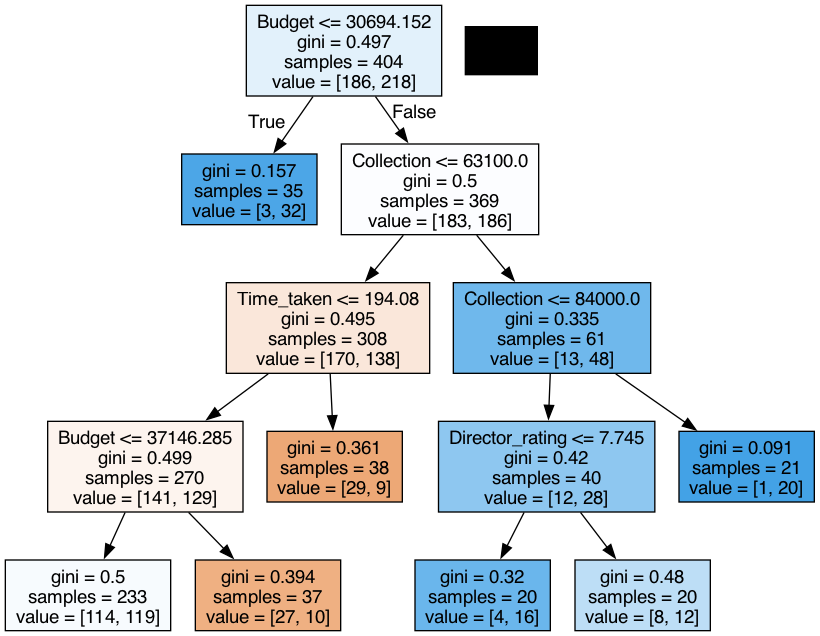

In [29]:
classification_tree1 = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
classification_tree1.fit(X_train, y_train)

dot_data = tree.export_graphviz(classification_tree1, out_file=None, feature_names=X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)

Image(graph1.create_png())

In [30]:
accuracy_score(y_test, classification_tree1.predict(X_test))

0.5588235294117647

## Bagging
- In Bagging we will grow full tree

In [31]:
classification_tree = tree.DecisionTreeClassifier()

In [34]:
bagging_classifier = BaggingClassifier(estimator=classification_tree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [35]:
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [36]:
confusion_matrix(y_test, bagging_classifier.predict(X_test))

array([[27, 17],
       [22, 36]])

In [37]:
accuracy_score(y_test, bagging_classifier.predict(X_test))

0.6176470588235294

## Random Forest

In [39]:
random_classifier = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [40]:
random_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [41]:
confusion_matrix(y_test, random_classifier.predict(X_test))

array([[25, 19],
       [18, 40]])

In [42]:
accuracy_score(y_test, random_classifier.predict(X_test))

0.6372549019607843

Optimization of Hyper Parameters 

## Grid Search

In [44]:
random_classifier = RandomForestClassifier(n_estimators=250, random_state=42)

In [57]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
               "min_samples_split" : [2, 3, 10],
               "min_samples_leaf": [1, 2, 4],
               "n_estimators": [250, 500, 1000]}

In [58]:
grid_search = GridSearchCV(random_classifier, params_grid, 
                           n_jobs=-1, cv=5, scoring='accuracy')

In [59]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250, 500, 1000]},
             scoring='accuracy')

In [60]:
grid_search.best_params_

{'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 250}

In [61]:
estimator_classifier = grid_search.best_estimator_

In [62]:
accuracy_score(y_test, estimator_classifier.predict(X_test))

0.6274509803921569

In [63]:
confusion_matrix(y_test, estimator_classifier.predict(X_test))

array([[25, 19],
       [19, 39]])

## Boosting
- The tree grows sequencially by taking information from previously grown tree
- There are 3 different Boosting techniques
    - Gradient Boost - slow learning procedure
    - Ada Boost
    - XG Boost

Gradient Boosting 

In [65]:
gradient_classifier = GradientBoostingClassifier()
gradient_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
accuracy_score(y_test, gradient_classifier.predict(X_test))

0.5784313725490197

In [71]:
gradient_classifier1 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
gradient_classifier1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [72]:
accuracy_score(y_train, gradient_classifier1.predict(X_train))

0.7623762376237624

In [73]:
accuracy_score(y_test, gradient_classifier1.predict(X_test))

0.6176470588235294

Ada Boost

In [75]:
ada_classifier = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)
ada_classifier.fit(X_train, y_train)

/Users/priya/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [76]:
accuracy_score(y_train, ada_classifier.predict(X_train))

0.8886138613861386

In [77]:
accuracy_score(y_test, ada_classifier.predict(X_test))

0.6274509803921569

In [87]:
ada_classifier1 = AdaBoostClassifier(random_classifier, learning_rate=0.05, n_estimators=500)

In [88]:
ada_classifier1.fit(X_train, y_train)

/Users/priya/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [89]:
accuracy_score(y_test, ada_classifier1.predict(X_test))

0.6274509803921569

XG Boost

In [95]:
xg_classifier = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1)
xg_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
accuracy_score(y_test, xg_classifier.predict(X_test))

0.6568627450980392

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

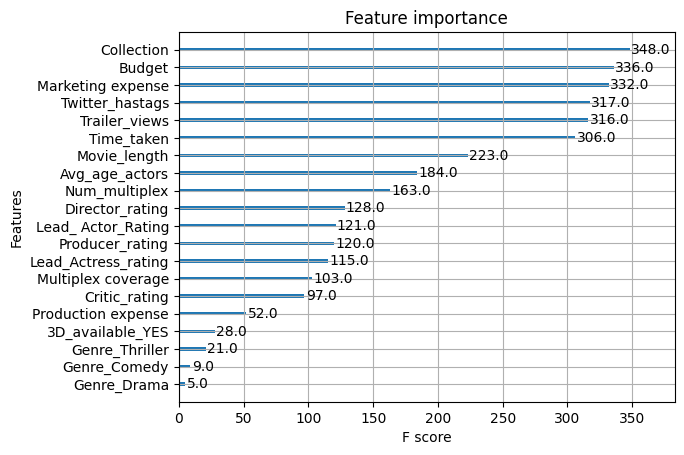

In [97]:
xgb.plot_importance(xg_classifier)

In [98]:
xg_classifier = xgb.XGBClassifier(n_estimator=250, learning_rate=0.1, random_state=42)

In [100]:
param_test1 = {
    'max_depth' : range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample' : [0.8,0.9],
    'colsample_bytree' : [0.8, 0.9],
    'reg_alpha' : [1e-2, 0.1, 1]
}

In [102]:
grid_search = GridSearchCV(xg_classifier, param_test1, n_jobs=1, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

/Users/priya/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [06:36:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/priya/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [06:36:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/priya/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [06:36:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/priya/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [06:36:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/priya

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator=500,
                                     n_estimators=None, n_jobs=None,
                                     num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [103]:
estimator_xg = grid_search.best_estimator_

In [104]:
accuracy_score(y_test, estimator_xg.predict(X_test))

0.6470588235294118

In [105]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 9,
 'reg_alpha': 1,
 'subsample': 0.8}